In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
DIR = "../input/moa-ensemble-check/"
mlp = pd.read_csv(DIR+"mlp1840.csv")
tab = pd.read_csv(DIR+"sub_tab1859.csv")
xgb = pd.read_csv(DIR+"xgb1951.csv")

check_mlp = pd.read_csv(DIR+"mlp_oof2.csv")
check_tabnet = pd.read_csv(DIR+"tab_oof2.csv")
check_tabnet_val = pd.read_csv(DIR+"tab_newval_oof.csv").drop("sig_id", axis=1)
check_xgb = pd.read_csv(DIR+"xgb_oof.csv")
check_svm = pd.read_csv(DIR+"svm_oof2.csv")
targets = pd.read_csv('../input/lish-moa/train_targets_scored.csv').drop("sig_id", axis=1)
train = pd.read_csv('../input/lish-moa/train_features.csv')

In [2]:
cons_train_index = train[train.cp_type!="ctl_vehicle"].index

In [3]:
p_min = 0.001
p_max = 1 - p_min
check_tabnet2 = check_tabnet.copy()
check_tabnet2.loc[cons_train_index,:]= np.clip(check_tabnet2.loc[cons_train_index,:], p_min, p_max)

check_svm2 = check_svm.copy()
check_svm2.loc[cons_train_index,:]= np.clip(check_svm2.loc[cons_train_index,:], p_min, p_max)

check_tabnet_val2 = check_tabnet_val.copy()
check_tabnet_val2.loc[cons_train_index,:] = np.clip(check_tabnet_val.loc[cons_train_index,:], p_min, p_max)

# output correlation check

In [4]:
print(mlp.corrwith(xgb).max(), mlp.corrwith(xgb).min(), mlp.corrwith(xgb).mean(), mlp.corrwith(xgb).std())
print(mlp.corrwith(tab).max(), mlp.corrwith(tab).min(), mlp.corrwith(tab).mean(), mlp.corrwith(tab).std()) 
print(xgb.corrwith(tab).max(), xgb.corrwith(tab).min(), xgb.corrwith(tab).mean(), xgb.corrwith(tab).std())
#print(mlp.corrwith(tl).max(), mlp.corrwith(tl).min(), mlp.corrwith(tl).mean(), mlp.corrwith(tl).std())
#print(tl.corrwith(tab).max(), tl.corrwith(tab).min(), tl.corrwith(tab).mean(), tl.corrwith(tab).std()) 
#print(xgb.corrwith(tl).max(), xgb.corrwith(tl).min(), xgb.corrwith(tl).mean(), xgb.corrwith(tl).std())

0.9999999791302244 0.030860694801952644 0.6116583825780203 0.23744212858294525
0.9985353880543508 0.3700866219600505 0.8051177238773994 0.11991313184938018
0.9965936610503259 0.06435090171801035 0.5870370216863928 0.18436435223596784


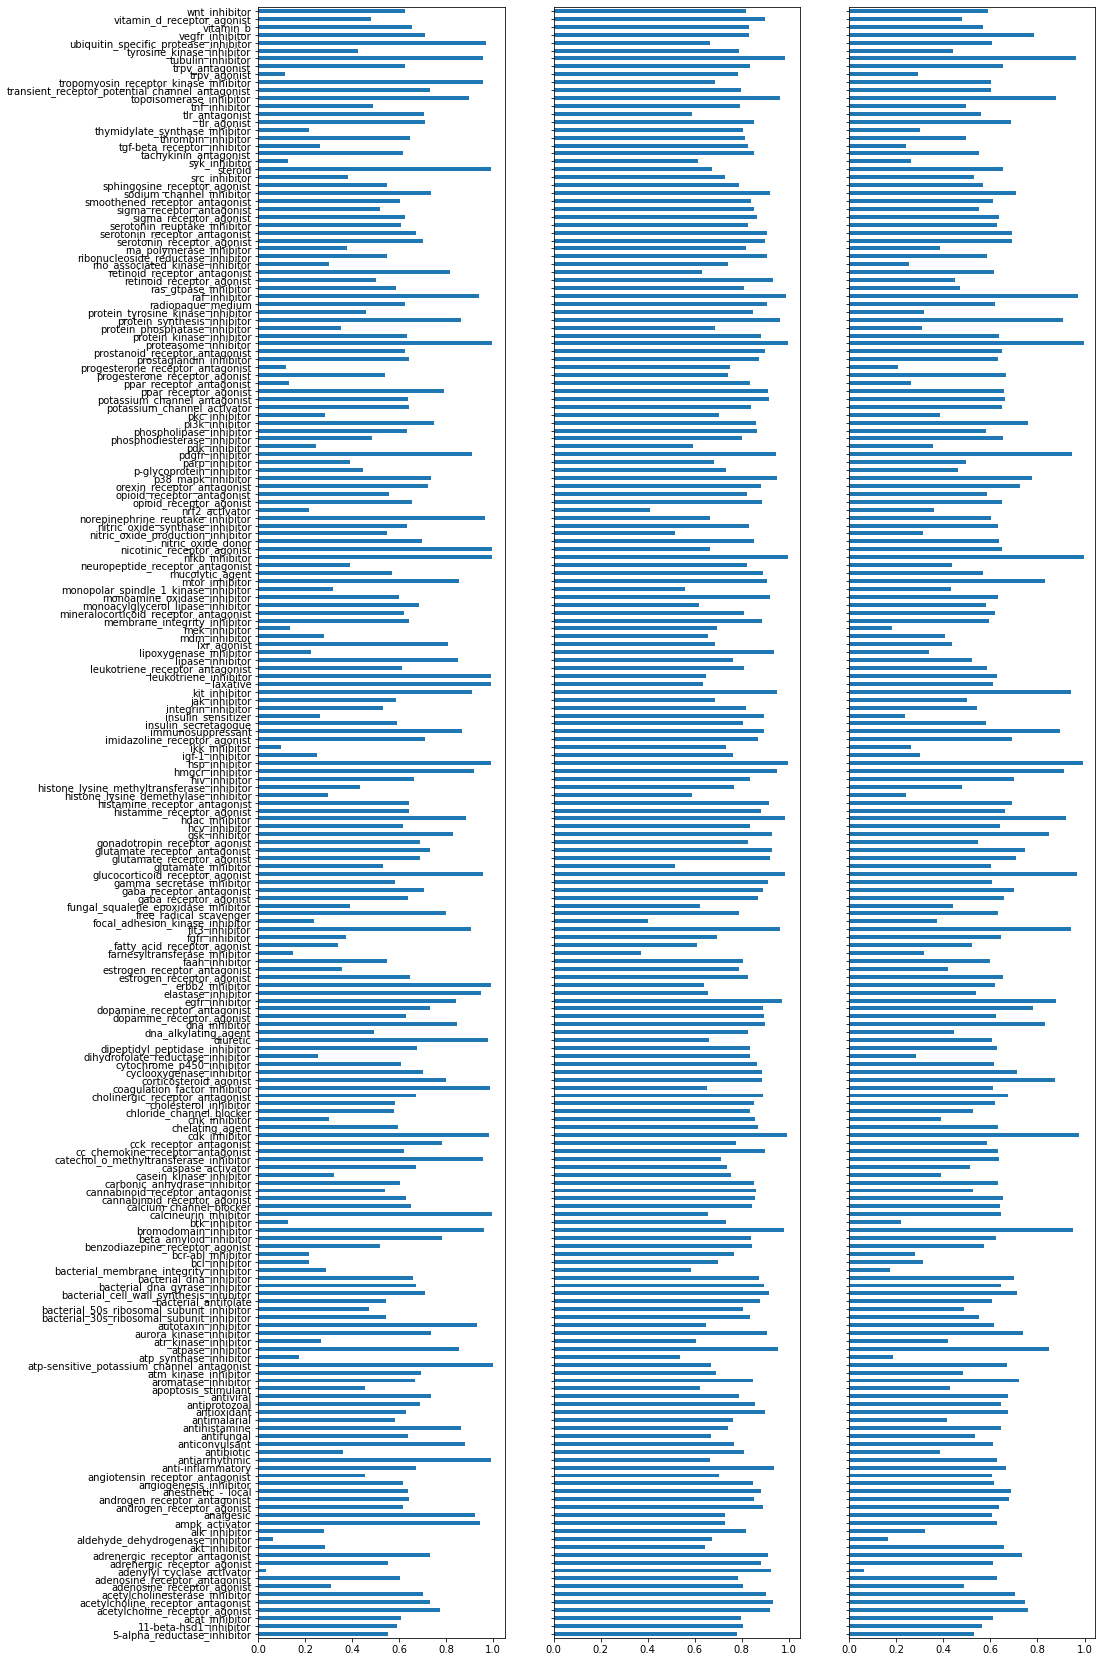

In [5]:
plt.figure(figsize=(15,30))
plt.subplot(1,3,1)
mlp.corrwith(xgb).plot(kind="barh")
plt.subplot(1,3,2)
#plt.axis('off')
mlp.corrwith(tab).plot(kind="barh",sharey=True)
plt.subplot(1,3,3)
#plt.axis('off')
xgb.corrwith(tab).plot(kind="barh",sharey=True)

In [6]:
check_tabnet_val2 = pd.DataFrame(np.array(check_tabnet_val2))
check_tabnet_val2

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,0.00100,0.001732,0.001283,0.013606,0.040014,0.005768,0.003474,0.002616,0.001000,0.010460,...,0.001,0.001000,0.002065,0.001571,0.001000,0.001000,0.001000,0.001223,0.001000,0.001000
1,0.00100,0.001000,0.001562,0.012176,0.010442,0.001700,0.002802,0.003355,0.001000,0.012524,...,0.001,0.001000,0.002306,0.001000,0.001000,0.001000,0.001156,0.001130,0.005260,0.001809
2,0.00100,0.001069,0.001250,0.003281,0.010883,0.001295,0.002225,0.007531,0.001414,0.014370,...,0.001,0.002657,0.001492,0.001000,0.005148,0.001046,0.008248,0.001935,0.001000,0.002663
3,0.00100,0.001000,0.001000,0.001000,0.007451,0.001252,0.001000,0.001000,0.001000,0.001000,...,0.001,0.014328,0.001000,0.485110,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
4,0.00100,0.001354,0.001524,0.005568,0.007144,0.002717,0.004062,0.002263,0.001000,0.015926,...,0.001,0.001580,0.004425,0.001000,0.001217,0.001000,0.001000,0.001468,0.001218,0.002529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.00203,0.001482,0.001596,0.004349,0.009858,0.001983,0.002405,0.001447,0.001000,0.007262,...,0.001,0.001000,0.002777,0.001000,0.001071,0.001429,0.001000,0.001484,0.001000,0.001687
23810,0.00100,0.001000,0.003796,0.004223,0.001720,0.001798,0.001000,0.005082,0.001000,0.001538,...,0.001,0.001000,0.002521,0.001000,0.009547,0.001000,0.038947,0.001000,0.030975,0.003454
23811,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23812,0.00100,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001,0.001000,0.001000,0.001000,0.002579,0.001000,0.002323,0.001000,0.001000,0.001000


In [7]:
print(check_mlp.corrwith(check_tabnet).max(), check_mlp.corrwith(check_tabnet).min(), 
      check_mlp.corrwith(check_tabnet).mean(), check_mlp.corrwith(check_tabnet).std())
print(check_mlp.corrwith(check_tabnet2).max(), check_mlp.corrwith(check_tabnet2).min(), 
      check_mlp.corrwith(check_tabnet2).mean(), check_mlp.corrwith(check_tabnet2).std())
result = []
for i in range(206):
    result.append(np.corrcoef(check_mlp.iloc[:,i], check_tabnet_val2.iloc[:,i])[0,1])
print(np.max(result), np.min(result), np.mean(result), np.std(result))
print(check_mlp.corrwith(check_svm).max(), check_mlp.corrwith(check_svm).min(), 
      check_mlp.corrwith(check_svm).mean(), check_mlp.corrwith(check_svm).std())
print(check_mlp.corrwith(check_svm2).max(), check_mlp.corrwith(check_svm2).min(), 
      check_mlp.corrwith(check_svm2).mean(), check_mlp.corrwith(check_svm2).std())
print(check_tabnet2.corrwith(check_svm2).max(), check_tabnet2.corrwith(check_svm2).min(), 
      check_tabnet2.corrwith(check_svm2).mean(), check_tabnet2.corrwith(check_svm2).std())

print("previous version")
print(mlp.corrwith(tab).max(), mlp.corrwith(tab).min(), mlp.corrwith(tab).mean(), mlp.corrwith(tab).std()) 
print(xgb.corrwith(tab).max(), xgb.corrwith(tab).min(), xgb.corrwith(tab).mean(), xgb.corrwith(tab).std())

0.9959539601158081 0.08390283804942246 0.5295034711801648 0.17949927768062585
0.9999999975957272 0.08327625622671284 0.5795119435355212 0.2105047062332063
0.9996081713714172 0.04600683307968248 0.551102531276184 0.21356173688621488
0.9783321950339905 0.02394739236615096 0.46129340145794545 0.2274335068672173
0.9999999975957272 0.026971438804577422 0.5110241899961252 0.2524640381108157
1.0000000000000002 0.017569046450087902 0.4528096464892659 0.2627136278734893
previous version
0.9985353880543508 0.3700866219600505 0.8051177238773994 0.11991313184938018
0.9965936610503259 0.06435090171801035 0.5870370216863928 0.18436435223596784


# ensemble ratio

In [8]:
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check_tabnet)))

OOF log loss:  0.015617277282027095


In [9]:
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check_tabnet2)))

OOF log loss:  0.015754011663420234


In [10]:
check = 0.09 * check_svm2 + 0.01 * check_tabnet2 + 0.9 * check_mlp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.015413606646770387


In [11]:
check = 0.33 * check_svm + 0.33 * check_tabnet + 0.34 * check_mlp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.01500156922038759


In [12]:
check = 0.35 * check_svm2 + 0.15 * check_tabnet2 + 0.5 * check_mlp
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check)))

OOF log loss:  0.015141449894074089


In [13]:
check_score = pd.read_csv('../input/lish-moa/train_targets_scored.csv').drop("sig_id", axis=1)
target_feats = [ i for i in check_score.columns if i != "sig_id"]
from scipy.optimize import minimize, fsolve


blend_train = []

# out of fold prediction
blend_train.append(np.array(check_tabnet))
blend_train.append(np.array(check_mlp))
blend_train = np.array(blend_train)
check_xgb2 = np.array(check_xgb2)

ratio = 0.01

np.random.seed(224)
total_scores = []
for i in range(len(target_feats)):
    def log_loss_func(weights):
        final_prediction = ratio * check_xgb2[:,i]
        for weight, prediction in zip(weights, blend_train):
            final_prediction += weight * prediction[:,i]
        return log_loss(np.ravel(targets.iloc[:,i]), np.ravel(final_prediction))
    
    best_score = np.inf
    best_weights = [0] * len(blend_train)
    for k in range(10):
        starting_values = np.random.rand(len(blend_train))
        starting_values /= sum(starting_values)
        bounds = [(0, 1)] * len(blend_train)
        cons = ({'type': 'eq', 'fun': lambda x:  1 - ratio - sum(x)}) 
            
        res = minimize(log_loss_func,
                   starting_values,
                   method='SLSQP',
                   bounds=bounds,
                   constraints = cons) 
        
        if best_score > res["fun"]:
            best_score = res["fun"]
            best_weights = res["x"]
        
    valid_prediction = ratio * check_xgb2[:,i]
    for weight, prediction in zip(best_weights, blend_train):
        valid_prediction += weight * prediction[:,i]
    print('Score: {}, Weights: {}'.format(round(res['fun'],8), res['x']))
    total_scores.append(res['fun'])
    check_score.loc[:,target_feats[i]] = valid_prediction
    
    #oof_test = svm_ratio * svm1_test[:,i]
    #for weight, prediction in zip(best_weights, blend_test):
    #    oof_test += weight * prediction[:,i]
        

print("final ensemble oof score:", np.mean(total_scores))
print('OOF log loss: ', log_loss(np.ravel(targets), np.ravel(check_score)))

NameError: name 'check_xgb2' is not defined